In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import derivative
import plotly.express as px

# Find Best Activation Function for Neural Network

### RELU Derivatives Visualisation

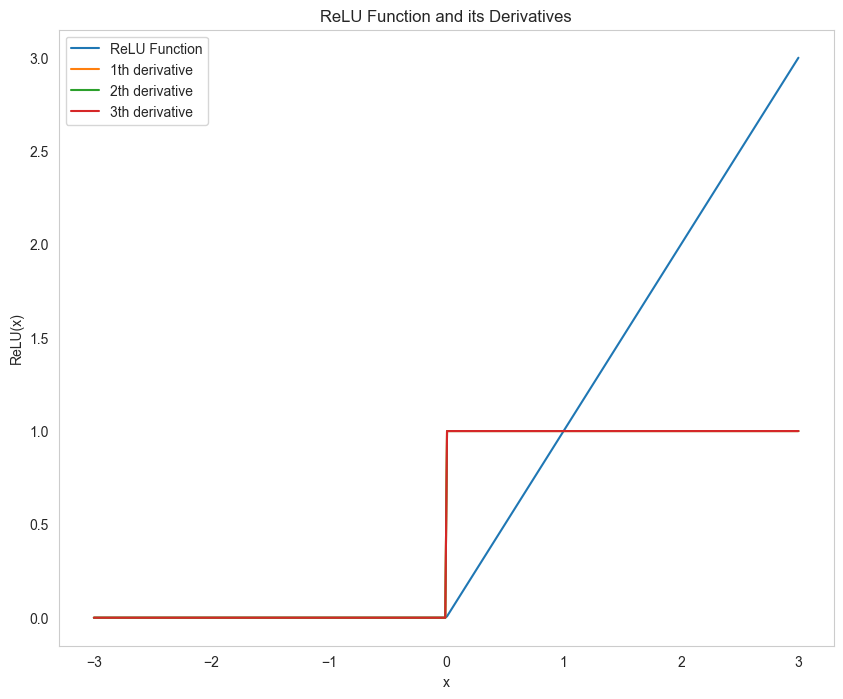

In [14]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

x_values = np.linspace(-3, 3, 400)

plt.figure(figsize=(10, 8))

# plot ReLU function
plt.plot(x_values, relu(x_values), label='ReLU Function')

# Plot derivatives
for i in range(1, 4): # Derivative of ReLU is either 0 or undefined at x=0, so we only need first and second
    y_values = relu_derivative(x_values)
    plt.plot(x_values, y_values, label=f'{i}th derivative')

plt.title('ReLU Function and its Derivatives')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.legend()
plt.grid()
plt.show()

### ELU Derivatives Visualisation

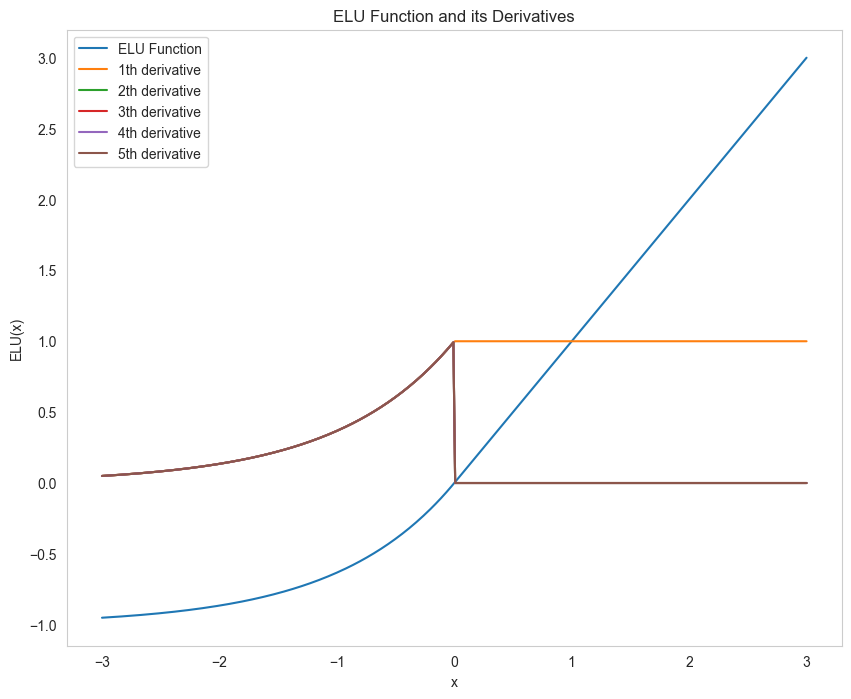

In [15]:
def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, order=1, alpha=1.0):
    if order == 1:
        return np.where(x >= 0, 1, alpha * np.exp(x))
    elif order == 2:
        return np.where(x >= 0, 0, alpha * np.exp(x))
    elif order == 3:
        return np.where(x >= 0, 0, alpha * np.exp(x))
    elif order == 4:
        return np.where(x >= 0, 0, alpha * np.exp(x))
    elif order == 5:
        return np.where(x >= 0, 0, alpha * np.exp(x))
    else:
        raise ValueError("Order not supported")

x_values = np.linspace(-3, 3, 400)

plt.figure(figsize=(10, 8))

# plot ELU function
plt.plot(x_values, elu(x_values), label='ELU Function')

# Plot derivatives
for i in range(1, 6):
    y_values = elu_derivative(x_values, order=i)
    plt.plot(x_values, y_values, label=f'{i}th derivative')

plt.title('ELU Function and its Derivatives')
plt.xlabel('x')
plt.ylabel('ELU(x)')
plt.legend()
plt.grid()
plt.show()

# Visualisation of test inference results

### Data Preparation

In [16]:
results = pd.read_csv("raw_data/test_prediction_output.csv")
display(results.head())
results.dtypes

,y/delta,y^+,u_tau,nu,Re_tau,u'u'_target,v'v'_target,w'w'_target,u'v'_target,U_target,...,P_target,k_target,u'u'_pred,v'v'_pred,w'w'_pred,u'v'_pred,U_pred,dU/dy_pred,P_pred,k_pred
0,0.541067,1079.295898,0.045879,0.000023,1994.755981,1.988068,0.726644,0.924051,-0.457271,22.907629,...,-0.726644,1.819382,1.987206,0.727407,0.924689,-0.459389,22.911385,0.003312,-0.727057,1.819694
1,0.301446,1563.266602,0.041487,0.000008,5185.896973,3.178295,1.030215,1.404106,-0.694730,23.492184,...,-1.035179,2.806308,3.180641,1.030694,1.403988,-0.695230,23.490280,0.001526,-1.035422,2.808106
2,0.314147,314.307434,0.050026,0.000050,1000.512024,2.772354,0.954510,1.293989,-0.676533,19.452902,...,-0.954510,2.510427,2.772407,0.955634,1.296655,-0.677621,19.454767,0.009810,-0.960349,2.512522
3,0.431432,860.601868,0.045879,0.000023,1994.755981,2.463012,0.849052,1.112930,-0.565982,22.200314,...,-0.849052,2.212497,2.466395,0.849554,1.112710,-0.566440,22.198898,0.003740,-0.850590,2.214591
4,0.209736,1087.671753,0.041487,0.000008,5185.896973,3.813344,1.128027,1.606014,-0.786165,22.510344,...,-1.131396,3.273692,3.813330,1.128175,1.604261,-0.785867,22.512329,0.002637,-1.132939,3.273201


y/delta         float64
y^+             float64
u_tau           float64
nu              float64
Re_tau          float64
u'u'_target     float64
v'v'_target     float64
w'w'_target     float64
u'v'_target     float64
U_target        float64
dU/dy_target    float64
P_target        float64
k_target        float64
u'u'_pred       float64
v'v'_pred       float64
w'w'_pred       float64
u'v'_pred       float64
U_pred          float64
dU/dy_pred      float64
P_pred          float64
k_pred          float64
dtype: object

In [17]:
values_ref = results[
    ["y^+", "Re_tau", "u'u'_target", "v'v'_target", "w'w'_target", "u'v'_target", "U_target", "k_target", "P_target"]
]
values_ref.head()

,y^+,Re_tau,u'u'_target,v'v'_target,w'w'_target,u'v'_target,U_target,k_target,P_target
0,1079.295898,1994.755981,1.988068,0.726644,0.924051,-0.457271,22.907629,1.819382,-0.726644
1,1563.266602,5185.896973,3.178295,1.030215,1.404106,-0.694730,23.492184,2.806308,-1.035179
2,314.307434,1000.512024,2.772354,0.954510,1.293989,-0.676533,19.452902,2.510427,-0.954510
3,860.601868,1994.755981,2.463012,0.849052,1.112930,-0.565982,22.200314,2.212497,-0.849052
4,1087.671753,5185.896973,3.813344,1.128027,1.606014,-0.786165,22.510344,3.273692,-1.131396


In [18]:
values_pred = results[["y^+", "Re_tau", "u'u'_pred","v'v'_pred","w'w'_pred","u'v'_pred", "U_pred", "k_pred","P_pred"]].sort_values(by="y^+")
values_pred.head()

,y^+,Re_tau,u'u'_pred,v'v'_pred,w'w'_pred,u'v'_pred,U_pred,k_pred,P_pred
27,0.000000,5185.896973,-0.012501,0.010145,0.000611,-0.001927,0.038036,0.000351,-0.001296
138,0.000000,1994.755981,0.005285,0.004073,-0.000180,0.002610,0.016006,0.005284,-0.003992
274,0.000000,1000.512024,-0.002832,0.002930,0.000822,0.001142,0.006854,0.001325,-0.003645
119,0.010546,182.087997,0.002716,0.002218,-0.001174,-0.000496,0.007643,0.002440,-0.002551
30,0.012141,1994.755981,0.004893,0.003913,-0.001782,0.002493,0.021448,0.004068,-0.003855


### Compute the L2-Norm of errors

In [19]:
for Re in values_pred["Re_tau"].unique():
    # Filter the reference and predicted values for the current Reynolds number
    values_ref_Re = values_ref[values_ref["Re_tau"] == Re].sort_values(by="y^+")
    values_pred_Re = values_pred[values_pred["Re_tau"] == Re].sort_values(by="y^+")

    quantities_ref = values_ref_Re.drop(columns=["Re_tau", "y^+"])
    quantities_pred = values_pred_Re.drop(columns=["Re_tau", "y^+"])

    # Calculate the L2-norm of the errors and the L2-norm of the reference values
    l2_norm_errors = np.linalg.norm(quantities_ref.values - quantities_pred.values, axis=0)
    l2_norm_ref = np.linalg.norm(quantities_ref.values, axis=0)

    rmse = np.sqrt(np.mean((quantities_ref.values - quantities_pred.values) ** 2, axis=0))
    mse = np.mean((quantities_ref.values - quantities_pred.values) ** 2, axis=0)

    # Calculate the relative L2-norm error in percent
    relative_l2_errors_percent = (l2_norm_errors / l2_norm_ref) * 100

    print(f"Reynolds number: {Re}")

    for i, col in enumerate(quantities_ref.columns):
        print(f"Value: {col}")
        print(f"Relative L2-norm Error: {relative_l2_errors_percent[i]:.2f}%")
        print(f"RMSE: {rmse[i]}")
        print(f"MSE: {mse[i]}") 

    print()

Reynolds number: 5185.89697265625
Value: u'u'_target
Relative L2-norm Error: 0.16%
RMSE: 0.006032828425009229
MSE: 3.639501880559933e-05
Value: v'v'_target
Relative L2-norm Error: 0.21%
RMSE: 0.0019576221313970144
MSE: 3.83228440933539e-06
Value: w'w'_target
Relative L2-norm Error: 0.15%
RMSE: 0.002212222707285423
MSE: 4.893929306629247e-06
Value: u'v'_target
Relative L2-norm Error: 0.20%
RMSE: 0.0012970763760055443
MSE: 1.6824071251916762e-06
Value: U_target
Relative L2-norm Error: 0.04%
RMSE: 0.008210237385228785
MSE: 6.74079979218084e-05
Value: k_target
Relative L2-norm Error: 0.10%
RMSE: 0.0030943695753057666
MSE: 9.57512306857799e-06
Value: P_target
Relative L2-norm Error: 0.17%
RMSE: 0.001597615005375711
MSE: 2.5523737054016335e-06

Reynolds number: 1994.7559814453125
Value: u'u'_target
Relative L2-norm Error: 0.18%
RMSE: 0.00629791861986939
MSE: 3.9663778942497556e-05
Value: v'v'_target
Relative L2-norm Error: 0.32%
RMSE: 0.0027477938785506325
MSE: 7.550371199000328e-06
Value: w

### Visualisation of prediction results vs ground truth

In [20]:


# Assuming `results` is your original DataFrame with actual values
# And it has a column `u'u'_pred` for the predicted values

# Split the actual and predicted values into two separate DataFrames
actual = results[['y^+', "u'u'_target", 'Re_tau']].copy()
actual['Type'] = 'Actual'

predicted = results[['y^+', 'Re_tau']].copy()
predicted["u'u'"] = results["u'u'_pred"]  # Use the predicted values
predicted['Type'] = 'Predicted'

# Combine the two DataFrames
combined_results = pd.concat([actual, predicted])

# Plot using Plotly Express with a color distinction for actual vs. predicted
fig = px.scatter_3d(
    combined_results,
    x='y^+',
    y="u'u'_target",
    z='Re_tau',
    color='Type',  # Use different colors for actual and predicted values
    symbol='Type',  # Use different symbols for actual and predicted values
    opacity=0.8,
    title="Comparison of Actual and Predicted u'u' Values",
    labels={'u'u'': "u'u' (Actual vs. Predicted)"},
    category_orders={"Type": ["Actual", "Predicted"]}  # Ensure consistent order of symbols in legend
)

# Update layout for better clarity
fig.update_layout(legend_title_text='Data Type')
fig.show()


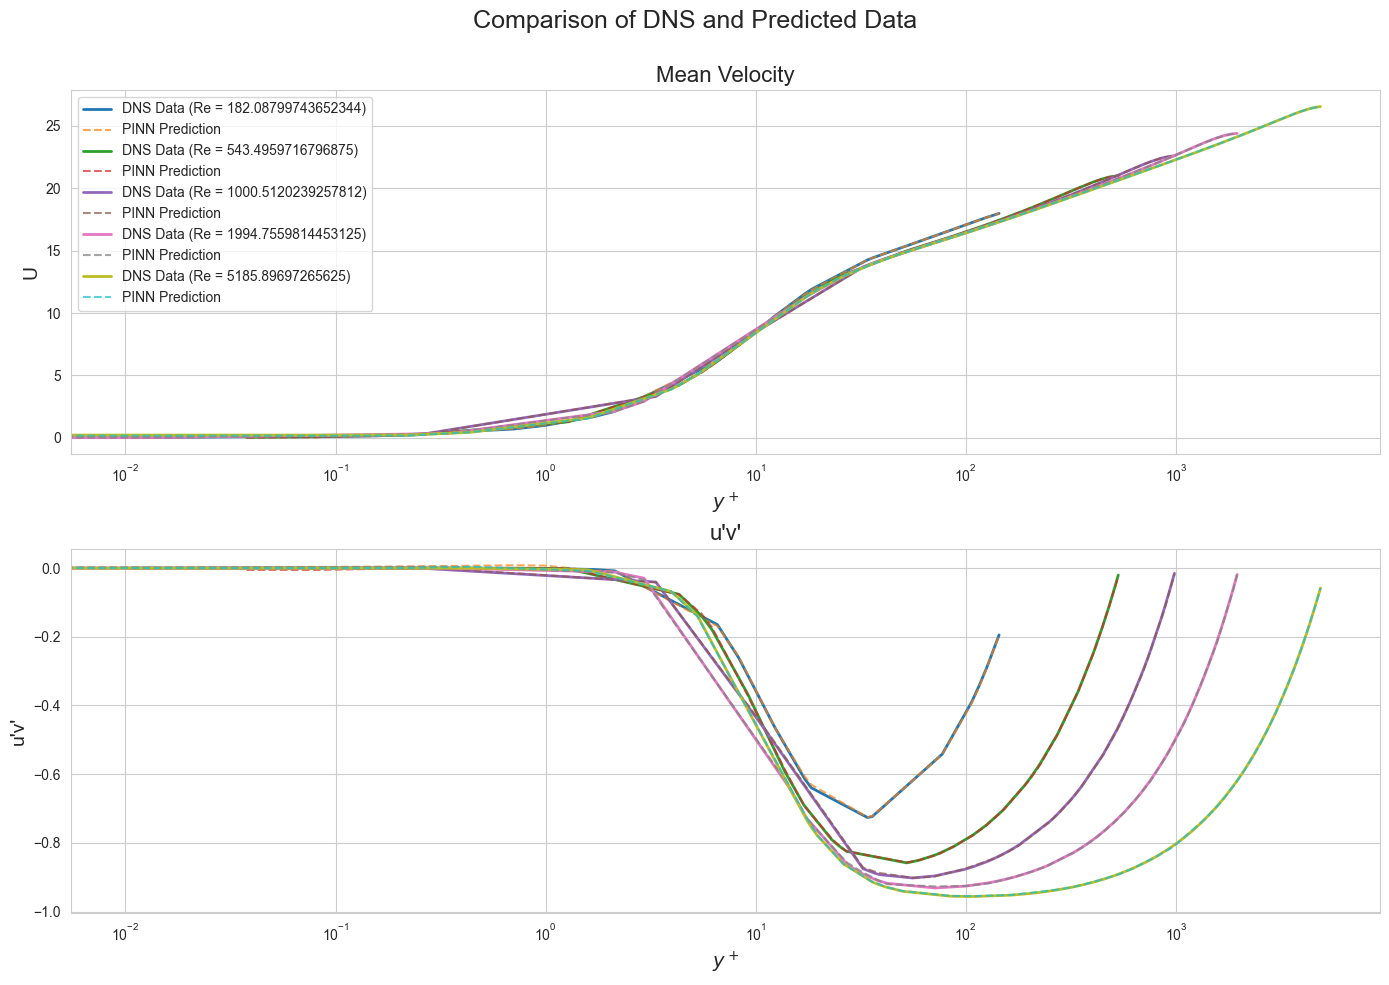

In [21]:
# Set the style
sns.set_style("whitegrid")

# Prepare the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Define a consistent color palette
palette = sns.color_palette("tab10", len(results["Re_tau"].unique()))

# Plot the data for each subplot
for i, (var, label) in enumerate(
    zip(["U", "u'v'"], ["Mean Velocity", "u'v'"])
):
    # Extract data for each Reynolds number
    for j, Re in enumerate(sorted(results["Re_tau"].unique())):
        Re_str = f"{Re:.0f}" if Re.is_integer() else f"{Re}"
        df_subset = results[results["Re_tau"] == Re].sort_values(by="y^+")

        # Actual data
        axs[i].semilogx(
            df_subset["y^+"],
            df_subset[f"{var}_target"],
            label=f"DNS Data (Re = {Re_str})",
            linewidth=2,
        )

        # Predicted data
        axs[i].semilogx(
            df_subset["y^+"],
            df_subset[f"{var}_pred"],
            label=f"PINN Prediction",
            linestyle="--",
            markersize=4,
            alpha=0.7,
        )

    axs[i].set_title(label, fontsize=16)
    axs[i].set_xlabel("$y^+$", fontsize=14)
    axs[i].set_ylabel(f"{var}", fontsize=14)

    # Improve the legend
    if i == 0:  # Adjust legend in the first plot only to avoid repetition
        axs[i].legend(
            loc="upper left",
            title_fontsize="medium",
        )

plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Add a main title
fig.suptitle("Comparison of DNS and Predicted Data", fontsize=18)

# Show the plot
plt.show()

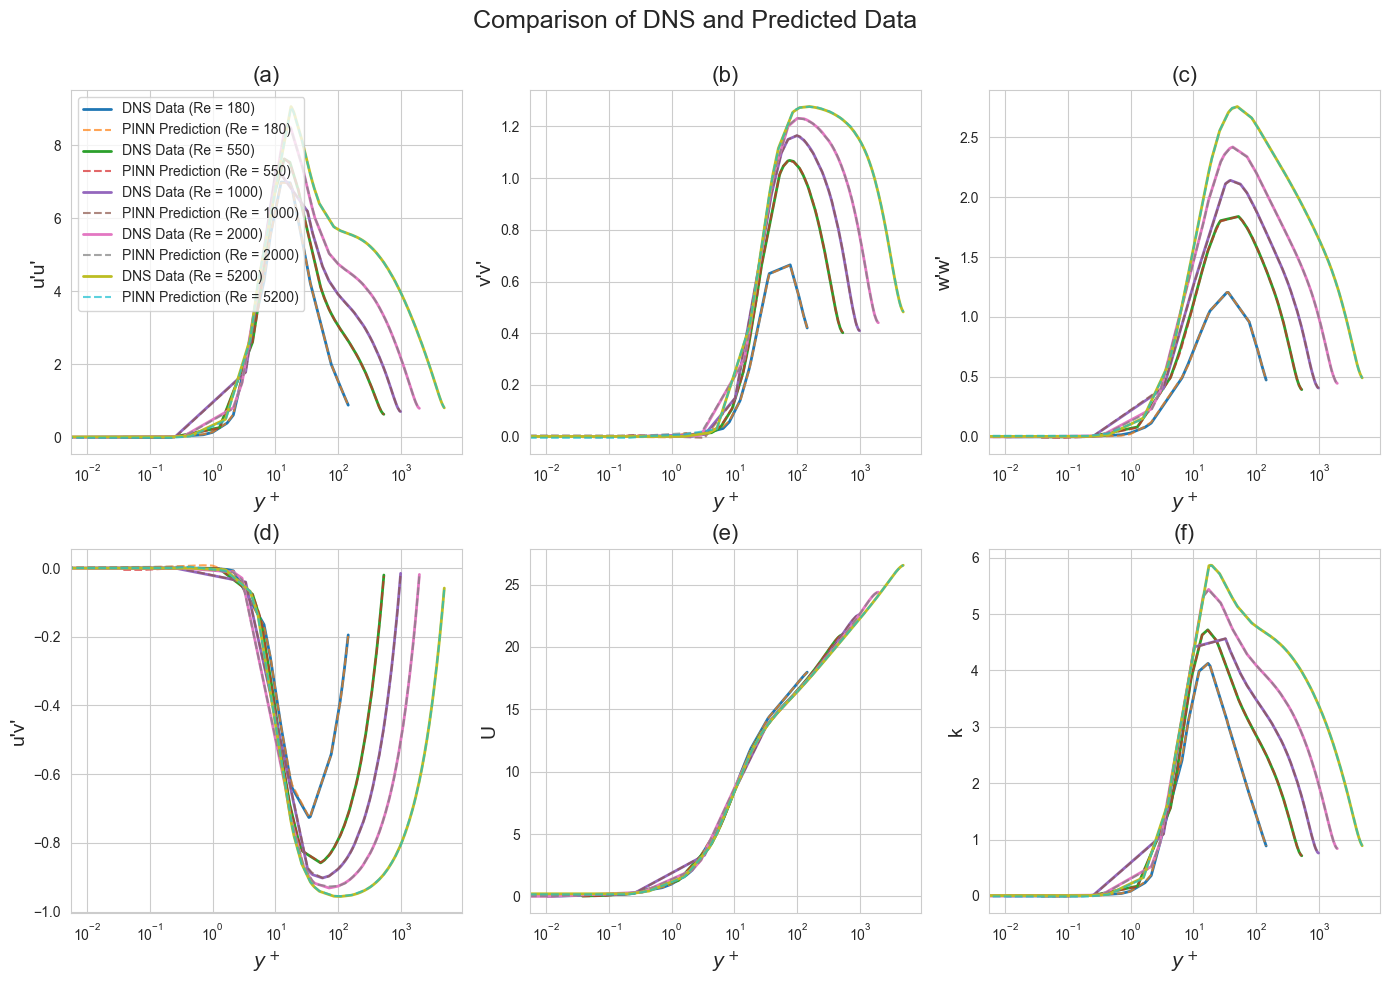

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Prepare the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
axs = axs.ravel()  # Flatten the array of axes

# Define a consistent color palette
palette = sns.color_palette("tab10", len(results["Re_tau"].unique()))

# Re
data_dict = {182: 180, 543: 550, 1001: 1000, 1995: 2000, 5186: 5200}

# Plot the data for each subplot
for i, (var, label) in enumerate(
    zip(
        ["u'u'", "v'v'", "w'w'", "u'v'", "U", "k"],
        ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"],
    )
):
    # Extract data for each Reynolds number
    for j, Re in enumerate(sorted(results["Re_tau"].unique())):
        Re_str = f"{Re:.0f}" if Re.is_integer() else f"{Re}"
        df_subset = results[results["Re_tau"] == Re].sort_values(by="y^+")

        # Actual data
        axs[i].semilogx(
            df_subset["y^+"],
            df_subset[f"{var}_target"],
            label=f"DNS Data (Re = {data_dict[round(float(Re_str))]})",
            linewidth=2,
        )

        # Predicted data
        axs[i].semilogx(
            df_subset["y^+"],
            df_subset[f"{var}_pred"],
            label=f"PINN Prediction (Re = {data_dict[round(float(Re_str))]})",
            linestyle="--",
            markersize=4,
            alpha=0.7,
        )

    axs[i].set_title(label, fontsize=16)
    axs[i].set_xlabel("$y^+$", fontsize=14)
    axs[i].set_ylabel(f"{var}", fontsize=14)

    # Improve the legend
    if i == 0:  # Adjust legend in the first plot only to avoid repetition
        axs[i].legend(
            loc="upper left",
            title_fontsize="medium",
        )

plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Add a main title
fig.suptitle("Comparison of DNS and Predicted Data", fontsize=18)

# Show the plot
plt.show()

In [23]:
for var in ["u'u'", "v'v'", "w'w'", "u'v'"]:
    # Calculate the absolute error for each Reynolds number
    results[f"{var}_error"] = abs(results[f"{var}_target"] - results[f"{var}_pred"])

    fig = px.density_contour(
        results,
        x="y^+",
        y=f"{var}_error",
        color="Re_tau",
       
    )
    fig.show()

In [25]:
fig = px.density_contour(
    results,
    x='y^+',
    y="u'u'_target",
    title="u'u' Heatmap for Actual Values",
    labels={"u'u'": "u'u' (Actual)"}
)
fig.update_traces(contours_coloring='fill', contours_showlabels = True)
fig.show()

fig = px.density_contour(
    results,
    x='y^+',
    y="u'u'_pred",
    title="u'u' Heatmap for Predicted Values",
    labels={"u'u'_pred": "u'u' (Predicted)"}
)
fig.update_traces(contours_coloring='fill', contours_showlabels = True)
fig.show()

In [26]:
fig = px.density_contour(
    results,
    x='y^+',
    y="v'v'_target",
    title="v'v' Heatmap for Actual Values",
    labels={"v'v'": "v'v' (Actual)"}
)
fig.update_traces(contours_coloring='fill', contours_showlabels = True)
fig.show()

fig = px.density_contour(
    results,
    x='y^+',
    y="v'v'_pred",
    title="v'v' Heatmap for Predicted Values",
    labels={"v'v'_pred": "v'v' (Predicted)"}
)
fig.update_traces(contours_coloring='fill', contours_showlabels = True)
fig.show()

In [27]:
fig = px.density_contour(
    results,
    x='y^+',
    y="w'w'_target",
    title="w'w' Heatmap for Actual Values",
    labels={"w'w'": "w'w' (Actual)"}
)
fig.update_traces(contours_coloring='fill', contours_showlabels = True)
fig.show()

fig = px.density_contour(
    results,
    x='y^+',
    y="w'w'_pred",
    title="w'w' Heatmap for Predicted Values",
    labels={"w'w'_pred": "w'w' (Predicted)"}
)
fig.update_traces(contours_coloring='fill', contours_showlabels = True)
fig.show()

In [33]:
# Adding an identifier for actual vs predicted
results['Value Type'] = 'Actual'
results_pred = results.copy()
results_pred["u'u'_target"] = results_pred["u'u'_pred"]
results_pred['Value Type'] = 'Predicted'

# Combining the data
parallel_data = pd.concat([results[['y^+', "u'u'_target", 'Re_tau', 'Value Type']],
                           results_pred[['y^+', "u'u'_pred", 'Re_tau', 'Value Type']]])

fig = px.parallel_coordinates(
    parallel_data,
    color="Re_tau",
    dimensions=['y^+', "u'u'_target", 'Re_tau'],
    color_continuous_scale=px.colors.diverging.Tealrose,
    labels={"u'u'": "u'u' Actual vs Predicted", "Re_tau": "Re_tau"},
    title="Parallel Coordinates Plot for Actual vs Predicted u'u' Values"
)

fig.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


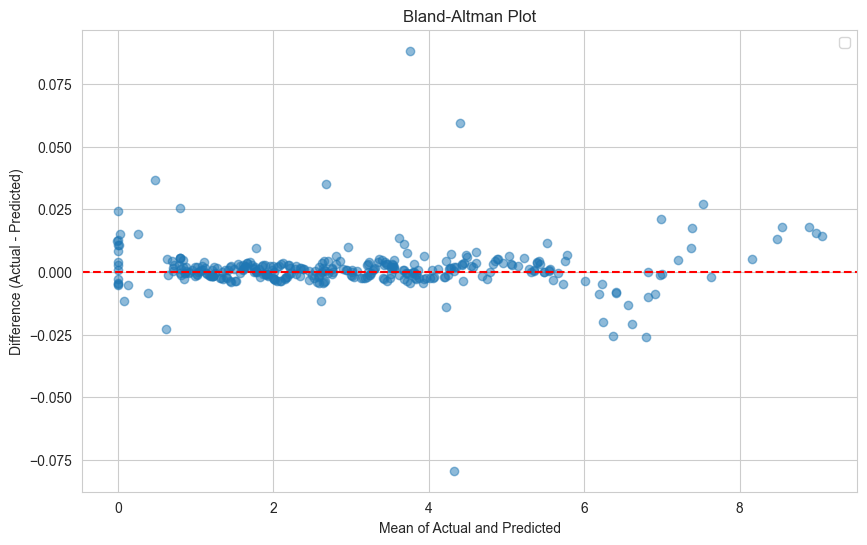

In [36]:
import matplotlib.pyplot as plt

# Calculate differences and means
results['difference'] = results["u'u'_target"] - results["u'u'_pred"]
results['mean'] = (results["u'u'_target"] + results["u'u'_pred"]) / 2

plt.figure(figsize=(10, 6))
plt.scatter(results['mean'], results['difference'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Mean of Actual and Predicted')
plt.ylabel('Difference (Actual - Predicted)')
plt.title('Bland-Altman Plot')
plt.legend()
plt.show()

# Training & Validation Loss

In [38]:
version_355 = pd.read_csv("raw_data/version_355.csv")
version_357 = pd.read_csv("raw_data/version_357.csv")
version_359 = pd.read_csv("raw_data/version_359.csv")
version_361 = pd.read_csv("raw_data/version_361.csv")

In [42]:
version355_max_step = version_355["Step"].max()
version357_max_step = version_357["Step"].max()
version359_max_step = version_359["Step"].max()
version361_max_step = version_361["Step"].max()

batch_size = 32

version_355["Epoch"] = version_355["Step"] // batch_size
version_357["Epoch"] = version_357["Step"] // batch_size
version_359["Epoch"] = version_359["Step"] // batch_size
version_361["Epoch"] = version_361["Step"] // batch_size

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

def plot_single(v, version_name):
    palette = sns.color_palette("magma", 4)  # Use a color palette with four colors

    fig, axs = plt.subplots()

    sns.lineplot(
        data=v,
        x="Epoch",
        y="train_total",
        label="Training Loss (Total)",
        color=palette[0],
        ax=axs
    )

    sns.lineplot(
        data=v,
        x="Epoch",
        y="train_pde",
        linestyle="--",
        label="Training Loss (PDE)",
        color=palette[2],
        ax=axs
    )

    sns.lineplot(
        data=v,
        x="Epoch",
        y="train_data",
        linestyle="--",
        label="Training Loss (Data)",
        
        color=palette[3],
        ax=axs
    )

    axs.set_yscale("log")  # Use a LogLocator to achieve log scale
    axs.set_xlabel("Epoch")
    axs.set_ylabel("Loss")
    axs.legend(title="Loss Type")

    plt.title("Training Losses Over Epochs ({})".format(version_name))
    plt.gcf().autofmt_xdate()  # Format the x-axis labels (if 'Step' is datetime)

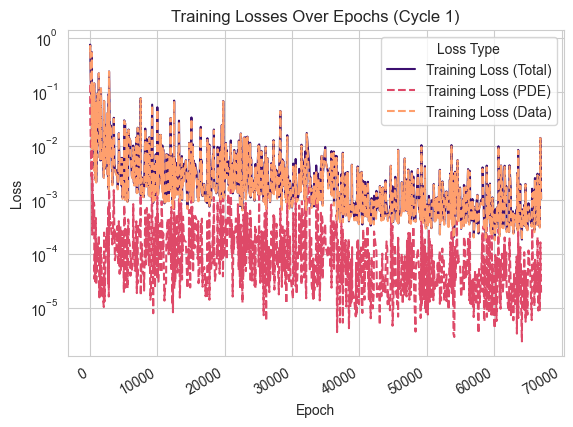

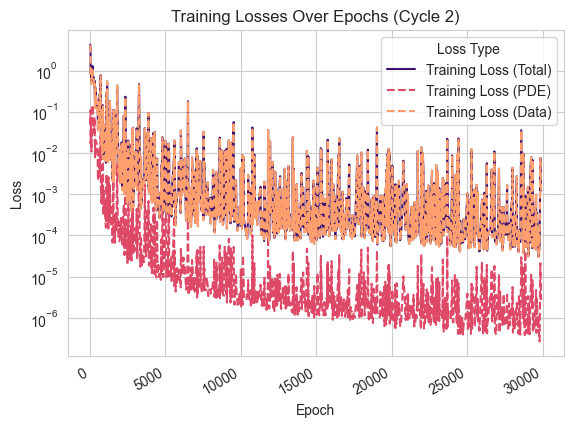

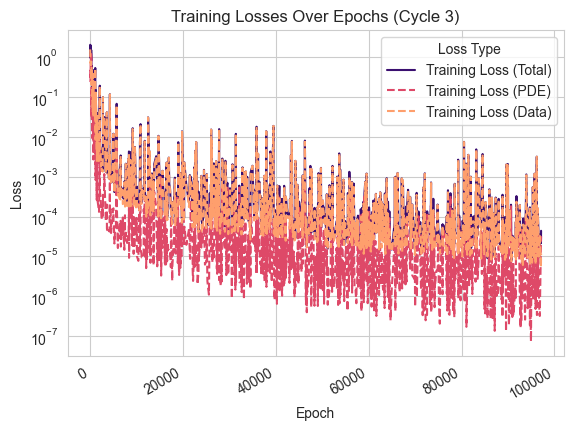

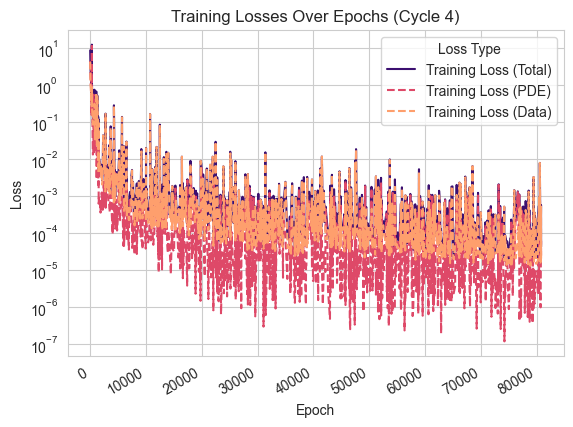

In [44]:
plot_single(version_355, "Cycle 1")
plot_single(version_357, "Cycle 2")
plot_single(version_359, "Cycle 3")
plot_single(version_361, "Cycle 4")

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

def plot_single_validation(v, version_name):
    palette = sns.color_palette("magma", 2)  # Use a color palette with four colors

    fig, axs = plt.subplots()

    sns.lineplot(
        data=v,
        x="Epoch",
        y="train_total",
        label="Training Loss",
        color=palette[0],
        ax=axs
    )

    sns.lineplot(
        data=v,
        x="Epoch",
        y="val",
        label="Validation Loss",
        color=palette[1],
        ax=axs
    
    )

    axs.set_yscale("log")  # Use a LogLocator to achieve log scale
    axs.set_xlabel("Epoch")
    axs.set_ylabel("Loss")
    axs.legend(title="Loss Type")

    plt.title("Training and Validation Losses Over Epochs ({})".format(version_name))
    plt.gcf().autofmt_xdate()  # Format the x-axis labels (if 'Step' is datetime)

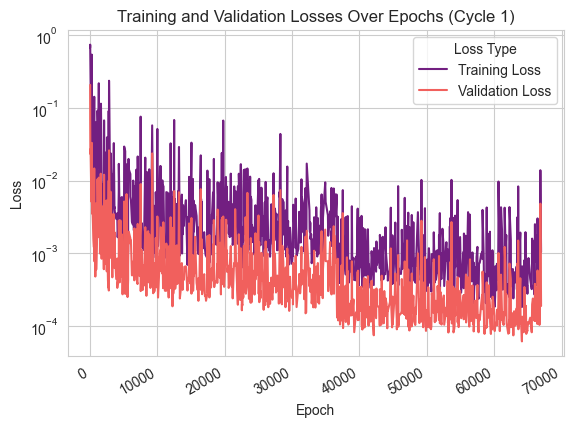

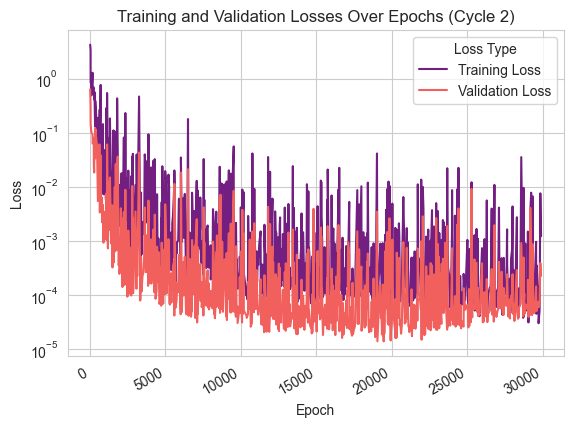

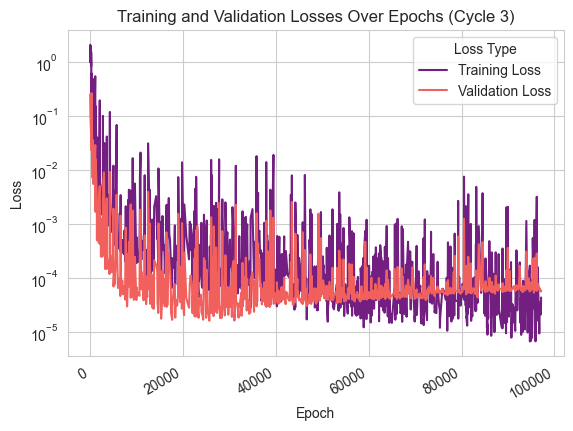

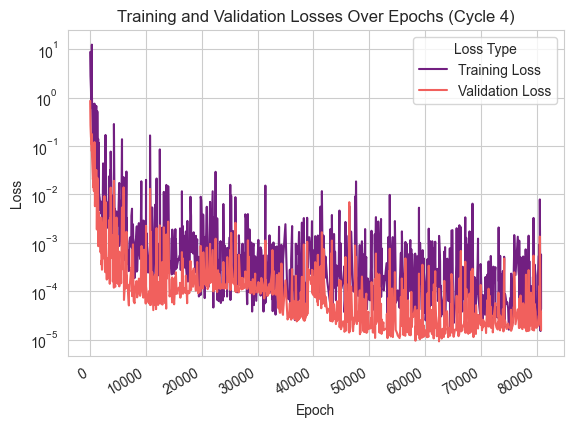

In [46]:
plot_single_validation(version_355, "Cycle 1")
plot_single_validation(version_357, "Cycle 2")
plot_single_validation(version_359, "Cycle 3")
plot_single_validation(version_361, "Cycle 4")

# Test Metrics

In [49]:
metrics = pd.read_csv("raw_data/metrics.csv")
metrics.head()

,version,mse_total,rmse_total,r2_total,mse_U,mse_dUdy,mse_P,mse_k,mse_uu,mse_vv,...,r2_ww,r2_uv,rmse_U,rmse_dUdy,rmse_P,rmse_k,rmse_uu,rmse_vv,rmse_ww,rmse_uv
0,Cycle 1,0.000107,0.010098,0.999998,0.000324,0.000013,0.000036,0.000084,0.000254,0.000031,...,0.999830,0.999515,0.016822,0.003575,0.005390,0.008884,0.015360,0.004732,0.008038,0.006359
1,Cycle 2,0.000055,0.006761,0.999999,0.000165,0.000004,0.000003,0.000057,0.000193,0.000004,...,0.999979,0.999950,0.011835,0.001970,0.001638,0.006569,0.012243,0.001935,0.002868,0.001979
2,Cycle 3,0.000035,0.005601,0.999999,0.000127,0.000002,0.000004,0.000030,0.000094,0.000007,...,0.999973,0.999951,0.010594,0.001274,0.002031,0.005029,0.008984,0.002530,0.003138,0.002007
3,Cycle 4,0.000071,0.007454,0.999998,0.000227,0.000002,0.000002,0.000078,0.000237,0.000008,...,0.999971,0.999950,0.013419,0.001213,0.001373,0.007132,0.013103,0.002667,0.003187,0.002045


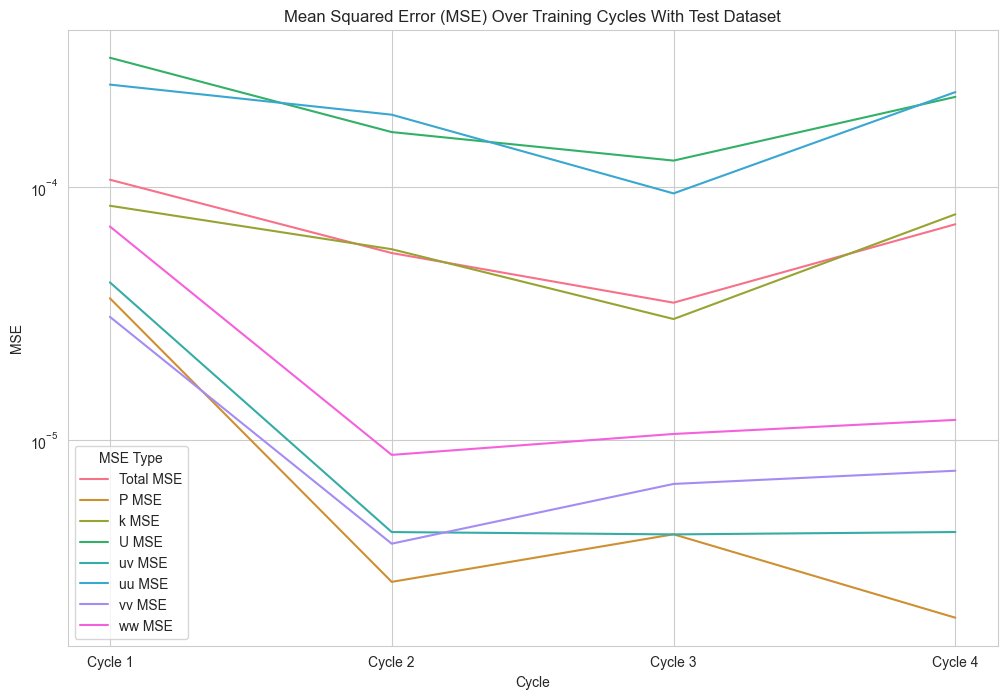

In [50]:
palette = sns.color_palette("husl", n_colors=8)
figure = plt.figure(figsize=(12, 8))

# Plot the total MSE
sns.lineplot(
    data=metrics,
    x="version",
    y="mse_total",
    label="Total MSE",
    color=palette[0]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="mse_P",
    label="P MSE",
    color=palette[1]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="mse_k",
    label="k MSE",
    color=palette[2]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="mse_U",
    label="U MSE",
    color=palette[3]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="mse_uv",
    label="uv MSE",
    color=palette[4]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="mse_uu",
    label="uu MSE",
    color=palette[5]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="mse_vv",
    label="vv MSE",
    color=palette[6]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="mse_ww",
    label="ww MSE",
    color=palette[7]
)

plt.title("Mean Squared Error (MSE) Over Training Cycles With Test Dataset")
plt.xlabel("Cycle")
plt.ylabel("MSE")
plt.yscale("log")
plt.legend(title="MSE Type")

plt.show()

In [51]:
# Convert RMSE to percentage
metrics['rmse_total'] = metrics['rmse_total'] * 100 
metrics['rmse_P'] = metrics['rmse_P'] * 100 
metrics['rmse_k'] = metrics['rmse_k'] * 100 
metrics['rmse_U'] = metrics['rmse_U'] * 100
metrics['rmse_uv'] = metrics['rmse_uv'] * 100 
metrics['rmse_uu'] = metrics['rmse_uu'] * 100
metrics['rmse_vv'] = metrics['rmse_vv'] * 100 
metrics['rmse_ww'] = metrics['rmse_ww'] * 100

metrics[['rmse_total', 'rmse_P', 'rmse_k', 'rmse_U', 'rmse_uv', 'rmse_uu', 'rmse_vv', 'rmse_ww']].head()

,rmse_total,rmse_P,rmse_k,rmse_U,rmse_uv,rmse_uu,rmse_vv,rmse_ww
0,1.009778,0.538985,0.888370,1.682179,0.635880,1.535996,0.473205,0.803816
1,0.676141,0.163761,0.656910,1.183482,0.197868,1.224340,0.193463,0.286769
2,0.560076,0.203144,0.502889,1.059415,0.200707,0.898418,0.252963,0.313844
3,0.745425,0.137347,0.713167,1.341943,0.204524,1.310323,0.266735,0.318740


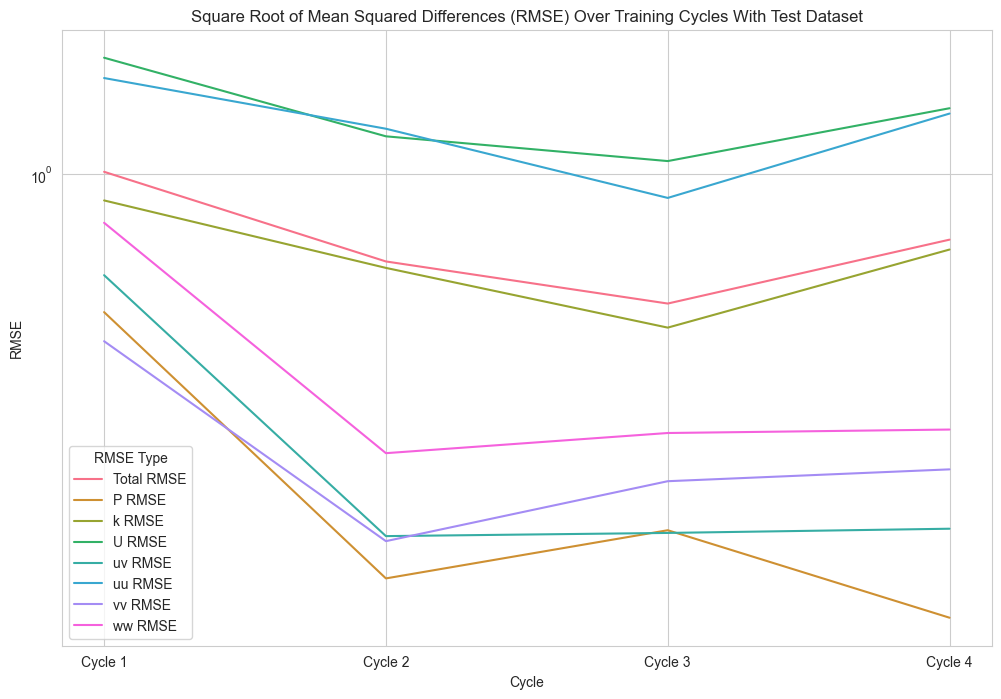

In [52]:
palette = sns.color_palette("husl", n_colors=8)
figure = plt.figure(figsize=(12, 8))

# Plot the total RMSE
sns.lineplot(
    data=metrics,
    x="version",
    y="rmse_total",
    label="Total RMSE",
    color=palette[0]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="rmse_P",
    label="P RMSE",
    color=palette[1]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="rmse_k",
    label="k RMSE",
    color=palette[2]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="rmse_U",
    label="U RMSE",
    color=palette[3]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="rmse_uv",
    label="uv RMSE",
    color=palette[4]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="rmse_uu",
    label="uu RMSE",
    color=palette[5]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="rmse_vv",
    label="vv RMSE",
    color=palette[6]
)

sns.lineplot(
    data=metrics,
    x="version",
    y="rmse_ww",
    label="ww RMSE",
    color=palette[7]
)

plt.title("Square Root of Mean Squared Differences (RMSE) Over Training Cycles With Test Dataset")
plt.xlabel("Cycle")
plt.ylabel("RMSE")
plt.yscale("log")
plt.legend(title="RMSE Type")

plt.show()